In [86]:
from data.mnist_seven import MNISTSeven

from model.denoising_ae import DenoisingAutoEncoder
from model.mlp import MultilayerPerceptron 

from report.evaluator import Evaluator
from report.performance_plot import PerformancePlot

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pylab

In [12]:
%matplotlib inline

In [ ]:
data = MNISTSeven("../data/mnist_seven.csv", 3000, 1000, 1000,
                      one_hot=False)

    # NOTE:
    # Other 1-digit classifiers do not make sense now for comparison purpose
    # So you should comment them out, let alone the MLP training and evaluation

    # Train the classifiers #
    # print("=========================")
    # print("Training the autoencoder..")

myDAE = DenoisingAutoEncoder(data.training_set,
                             data.validation_set,
                             data.test_set,
                             hidden_units=100,
                             corruption=0.4,
                             learning_rate=0.1, # prev: 0.05
                             epochs=10)
print("\nAutoencoder  has been training..")
myDAE.train()
print("Done..")

Loading data from ../data/mnist_seven.csv...
Data loaded.

Autoencoder  has been training..
Training epoch 1/10..


In [99]:
def show_test(index):
    f = pylab.figure()
    f.add_subplot(2, 1, 1)
    pylab.imshow(np.delete(myDAE.test_set.input[index], 0).reshape(28,28), cmap=cm.Greys_r)
                
    myDAE._feed_forward(myDAE.test_set.input[index])
    f.add_subplot(2, 1, 2) 
    pylab.imshow(myDAE._get_output_layer().outp.reshape(28,28), cmap=cm.Greys_r)
    pylab.show()

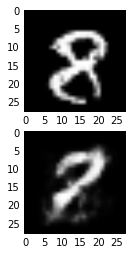

In [106]:
show_test(52)